Initial Shape: (1599, 12)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid      

/tmp/ipython-input-1194347839.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine, x="quality", palette="viridis")


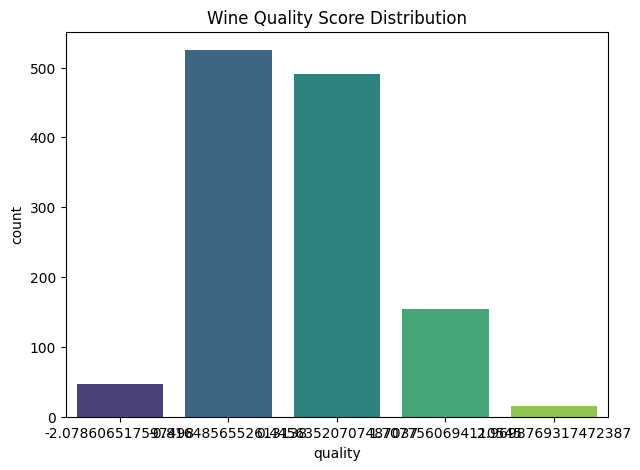

/tmp/ipython-input-1194347839.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine, x="quality_label", palette="Set2")


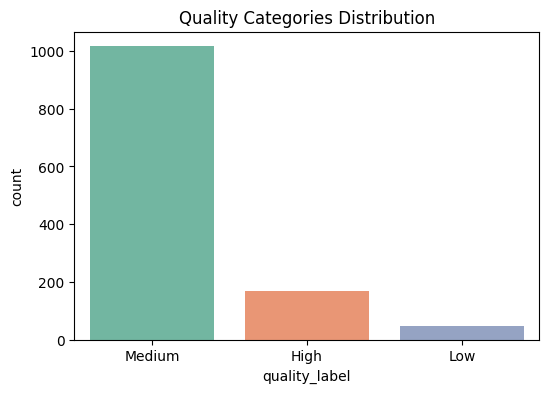

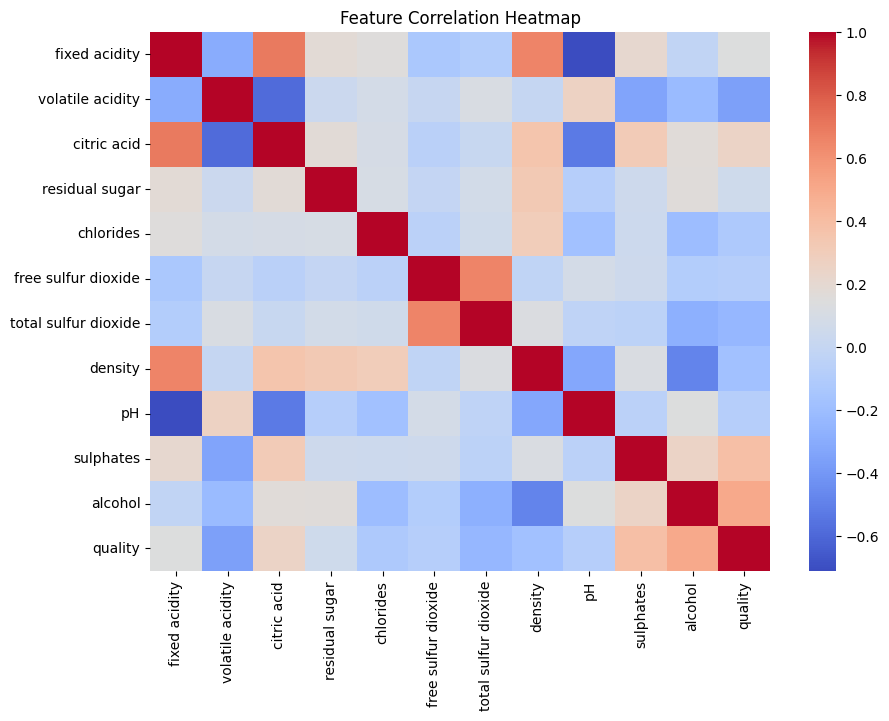

/tmp/ipython-input-1194347839.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="cool")


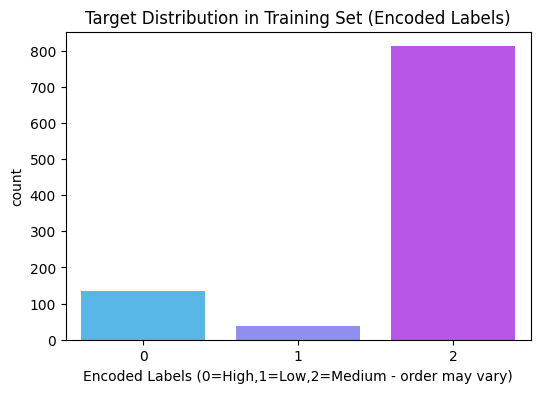

/tmp/ipython-input-1194347839.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine, x="quality_label", y="alcohol", palette="Set3")


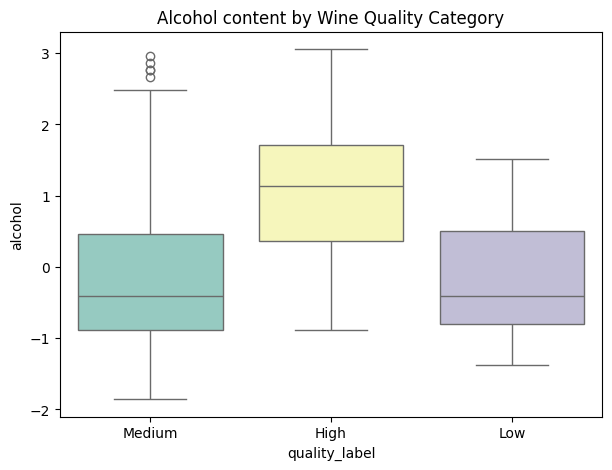

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats

# Step 2: Load Red Wine dataset
wine = pd.read_csv("winequality-red.csv", sep=";")
print("Initial Shape:", wine.shape)

# Step 3: Check info & missing values
print("\nInfo:\n")
print(wine.info())
print("\nMissing values:\n", wine.isnull().sum())

# Step 4: Handle missing values (if any)
wine.fillna(wine.median(numeric_only=True), inplace=True)

# Step 5: Remove duplicates
wine = wine.drop_duplicates()
print("After removing duplicates:", wine.shape)

# Step 6: Outlier detection & removal (Z-score method)
numeric_cols = wine.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(wine[numeric_cols]))
wine = wine[(z_scores < 3).all(axis=1)]
print("After outlier removal:", wine.shape)

# Step 7: Feature Engineering (create quality categories)
wine['quality_label'] = pd.cut(
    wine['quality'],
    bins=[0, 4, 6, 10],      # 3 groups: Low(<=4), Medium(5-6), High(7+)
    labels=['Low', 'Medium', 'High']
)

# Step 8: Encode categorical target
wine['quality_label'] = wine['quality_label'].astype(str)
wine['quality_label_enc'] = LabelEncoder().fit_transform(wine['quality_label'])

# Step 9: Scale numeric features
scaler = StandardScaler()
wine[numeric_cols] = scaler.fit_transform(wine[numeric_cols])

# Step 10: Prepare features (X) and target (y)
X = wine.drop(['quality', 'quality_label', 'quality_label_enc'], axis=1)
y = wine['quality_label_enc']

# Step 11: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nFinal Dataset Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# ------------------ Visualization ------------------

# 1. Distribution of Quality Scores
plt.figure(figsize=(7,5))
sns.countplot(data=wine, x="quality", palette="viridis")
plt.title("Wine Quality Score Distribution")
plt.show()

# 2. Distribution of Quality Labels (Low/Medium/High)
plt.figure(figsize=(6,4))
sns.countplot(data=wine, x="quality_label", palette="Set2")
plt.title("Quality Categories Distribution")
plt.show()

# 3. Heatmap of correlations
plt.figure(figsize=(10,7))
sns.heatmap(wine[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Target distribution in Train set
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="cool")
plt.title("Target Distribution in Training Set (Encoded Labels)")
plt.xlabel("Encoded Labels (0=High,1=Low,2=Medium - order may vary)")
plt.show()

# 5. Boxplot of Alcohol vs Quality Label
plt.figure(figsize=(7,5))
sns.boxplot(data=wine, x="quality_label", y="alcohol", palette="Set3")
plt.title("Alcohol content by Wine Quality Category")
plt.show()
